# エントロピーとジニ係数
- エントロピーやジニ係数を実際に計算してみよう
- 2クラス、多クラス分類における指標の変化を確認してみよう

## 1. ライブラリの読み込み

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

----
## 用語の復習

### (1) 情報量

- 確率変数$x$の値を得た際の驚きの度合いを表す指標
    - 情報量が大きい…起きそうもない事象が起きたこと知った
    - 情報量が小さい…いつでも起きそうな事象が起きたことを知った
  
- $h(x) = - \log_2p(x)$  
    - $h(x):$ 情報量  
    - $x:$ 確率変数  
    - $p(x):$ $x$となる確率  
  
#### [例]  
- 東京に雨が降ったという情報よりも、砂漠に雨が降った(確率が低い事象が起こった)という情報の方が驚くはず
    - ある日に東京に雨が降る確率$p(x)$を0.3とすれば、その情報量は $h(x) = - \log_2p(0.3) = 1.737$  
    - ある日に砂漠に雨が降る確率$p(x)$を0.01とすれば、その情報量は $h(x) = - \log_2p(0.01) = 6.644$  

#### [参考] $y=\mathrm{log}_2(x)$のグラフ


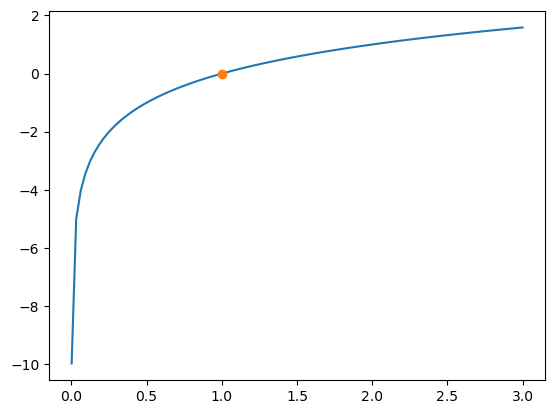

log_2(0.1)= -3.321928094887362
log_2(0.3)= -1.7369655941662063
log_2(0.5)= -1.0
log_2(1.0)= 0.0


In [2]:
# x軸の値を生成
x = np.linspace(0.001,3,100)
# y軸の値を計算
y = np.log2(x)

# グラフの表示
plt.plot(x,y)
# 点（1, 0）を表示
plt.plot(1,0, marker="o")
plt.show()

print("log_2(0.1)=", np.log2(0.1))
print("log_2(0.3)=", np.log2(0.3))
print("log_2(0.5)=", np.log2(0.5))
print("log_2(1.0)=", np.log2(1.0))

* $p(x) \leq 1$であるため、$\log_2p(x) \leq 0$となる
* $p(x)$が小さいほど、$-\log_2p(x)$は大きくなる

 ### (2) エントロピー（平均情報量）
- 情報量を平均化したもの
    - 確率変数$x$のばらつき具合を表す
    - 情報量$-\log_2p(x)$の期待値に相当
- $E = - \sum p(x)\log_2p(x)$
    - $E:$ エントロピー  
    - $x:$ 確率変数  
    - $p(x):$ $x$となる確率  
        - $p(x)=1$の場合は$\log_2(x)=0$とする  
        - $\sum(p(x))=1$  
        - $\max p(x) \leq 1$　　  

 ### (3) ジニ係数
- 誤分類する確率を平均化した指標
- $G = \sum p(x) (1 - p(x)) = 1 - \sum p(x)^2$
    - $G:$ ジニ係数  
    - $x:$ 確率変数  
    - $p(x):$ $x$となる確率  
    
#### [例]    
- ある日の東京の天気
    - 確率
        - $p($晴れ$)=0.5$
        - $p($雨$)=0.3$
        - $p($曇り$)=0.2$
    - エントロピー$E$とジニ係数$G$
        - $E = - \sum p(x)\log_2p(x) = 1.485$  
        - $G = 1 - \sum p(x)^2  = 0.62$  
- ある日の砂漠の天気
    - 確率
        - $p($晴れ$)=0.9$
        - $p($雨$)=0.01$
        - $p($曇り$)=0.09$
    - エントロピー$E$とジニ係数$G$
        - $E = - \sum p(x)\log_2p(x) = 0.516$  
        - $G = 1 - \sum p(x)^2  = 0.182$  
- 東京の天気は、確率変数$x$がばらついている
    - 砂漠の天気に比べ予測が難しい
    
 ----

## 2. 指標を計算する関数の定義
- エントロピー 
    - $E = - \sum p(x)\log_2p(x)$
- ジニ係数 
    - $G = \sum p(x) (1 - p(x)) = 1 - \sum p(x)^2$

In [3]:
def entropy(px):
    """
    エントロピーの計算
    px : 確率値のリスト
    """
    px = np.array(px).astype(float)
    # logx(0)は計算できないため、小さな値に置き換え
    px[px==0] = 1e-10 
    return -1 * np.sum(px*np.log2(px))

def gini_index(px):
    """
    ジニ係数（Gini Impurity）の計算
    px : 確率値のリスト
    """
    px = np.array(px).astype(float)
    return 1 - np.sum(px ** 2)



## 3. 確率と指標の関係
- $p(x) = 0.5$のとき、エントロピーとジニ係数は最大となる

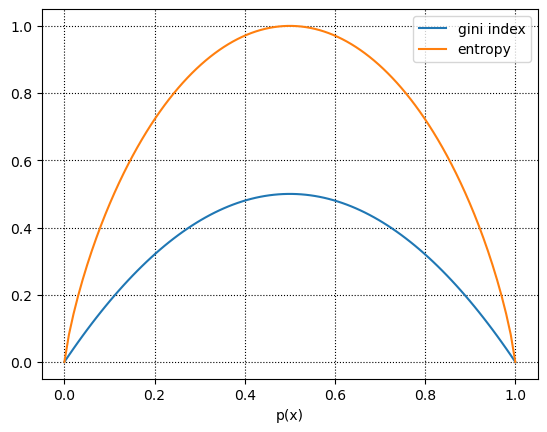

In [4]:
# 横軸の値を生成
p_list = np.linspace(0, 1, 100)
# 縦軸の値を格納するためのリスト
gini = np.zeros(len(p_list))
ent = np.zeros(len(p_list))

# 縦軸の値をG,Eそれぞれについて計算
for i, p in enumerate(p_list):
    gini[i] = gini_index(np.array([p, 1 - p]))
    ent[i] = entropy(np.array([p, 1 - p]))

# グラフの表示
sns.lineplot(x=p_list, y=gini, label='gini index')
sns.lineplot(x=p_list, y=ent, label='entropy')
# グリッド線の表示
plt.grid(which='major', color='black', linestyle=':')
plt.grid(which='minor', color='black', linestyle=':')
# ラベルの設定
plt.legend(loc='best')
plt.xlabel("p(x)")
plt.show()

## 4. 確率のばらつきと指標の関係
- 離散確率変数における各クラスの確率を、手入力で変更
- エントロピーやジニ係数の変化を確認

### 4-1. グラフを表示する関数の定義

In [5]:
def entropy_and_gini_index_plot(px):
    """
    エントロピーとジニ係数のグラフを表示
    px : 確率値のリスト
    """
    # 確率値のデータフレームを作成
    df = pd.DataFrame(px, columns=['p(x)'])

    # グラフのサイズを設定
    plt.figure(figsize=(7,2))
    
    # EとGを計算し、グラフタイトルに設定
    title = "Entropy = %s  "% round(entropy(px),4) + "Gini index = %s"% round(gini_index(px),4)
    plt.title(title)

    # 確率値を棒グラフとして表示
    sns.barplot(x=df.index, y='p(x)', data=df)

    # 軸のラベルと範囲を設定
    plt.xlabel('Discrete probability variable') # 離散確率変数
    plt.ylabel('p(x)')
    plt.ylim([0,1.0])
    plt.show()

### 4-2. 2クラス分類の場合

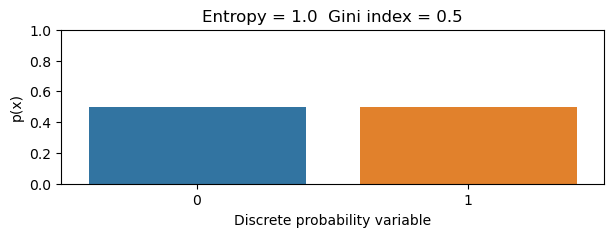

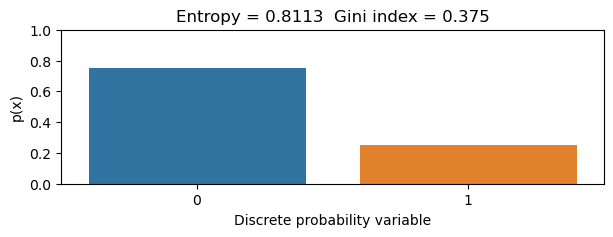

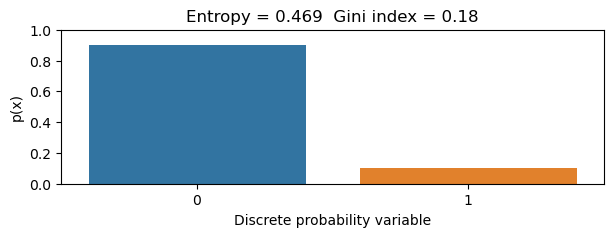

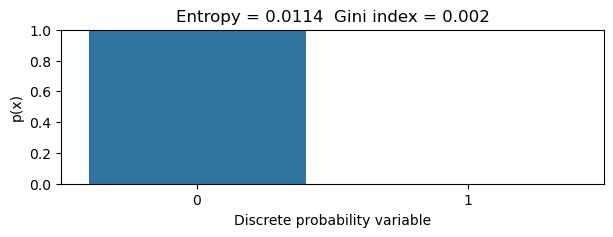

In [6]:
# クラス0の確率を徐々に大きくする
entropy_and_gini_index_plot([0.5,   0.5])
entropy_and_gini_index_plot([0.75,  0.25])
entropy_and_gini_index_plot([0.9,   0.1])
entropy_and_gini_index_plot([0.999, 0.001])

### 4-3. 3クラス分類の場合

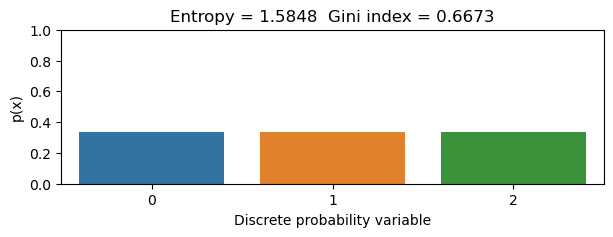

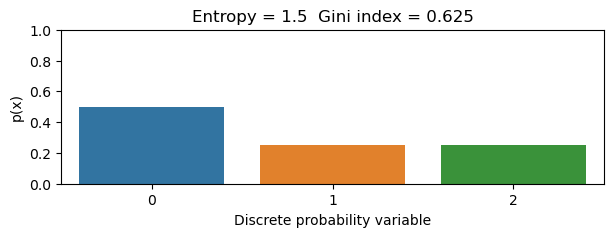

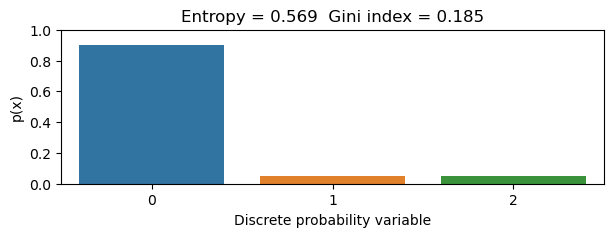

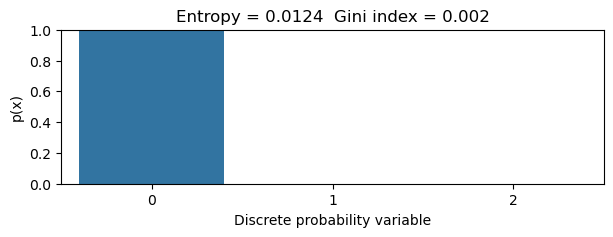

In [7]:
# クラス0の確率を徐々に大きくする
# クラス1・2の確率は同じ値
entropy_and_gini_index_plot([0.333,0.333,  0.333])
entropy_and_gini_index_plot([0.5,  0.25,   0.25])
entropy_and_gini_index_plot([0.9,  0.05,   0.05])
entropy_and_gini_index_plot([0.999,0.0005, 0.0005])

### 4-4. 10クラス分類の場合

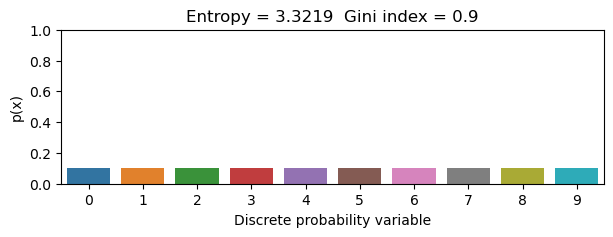

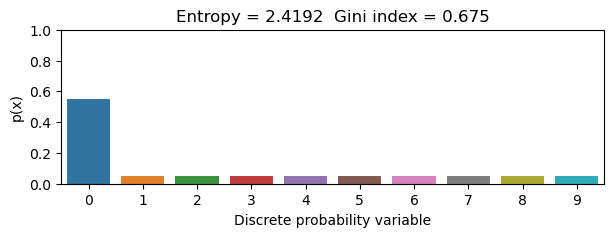

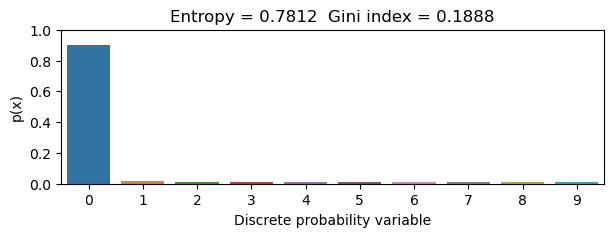

In [8]:
# クラス0の確率を徐々に大きくする
# クラス1～9の確率は同じ値
entropy_and_gini_index_plot([0.1]*10)# 要素自体を掛け算で増やす
entropy_and_gini_index_plot([0.55]+[0.05]*9) # リストの連結
entropy_and_gini_index_plot([0.9, 0.02]+[0.01]*8)